In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

# Print some descriptive statistics about the data and target
print( 'Data features:', iris.feature_names )
print( 'Target classes:', iris.target_names )
print( 'Truncated data array:', iris.data[ :5 ], '\n---\n', iris.data[ -5: ] )
print( 'Target labels:', iris.target )

# Set predictors X as petal length and width
# Set target y as iris class
X = iris.data[ :, [ 2, 3 ] ]
y = iris.target

Data features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Truncated data array: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 
---
 [[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]
Target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0.5,0.98,'Petal Length vs. Width')

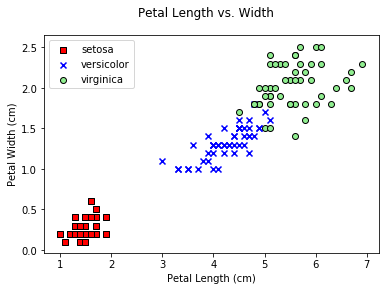

In [3]:
# Plot petal data to inspect how samples cluster

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Use petal length and width as predictor variables
X = iris.data[ :, [ 2, 3 ] ]
y = iris.target

markers = ( 's', 'x', 'o' )
colors = ( 'red', 'blue', 'lightgreen' )
cmap = ListedColormap( colors[ :len( np.unique( y ) ) ] )

fig = plt.figure()
for i, col in enumerate( np.unique( y ) ):
	plt.scatter(\
	x=X[ y==col, 0 ], y=X[ y==col, 1 ],\
	c=cmap( i ), marker=markers[ i ],\
	edgecolor='black', label=col )
plt.xlabel( 'Petal Length (cm)' )
plt.ylabel( 'Petal Width (cm)' )
plt.legend( ['setosa', 'versicolor', 'virginica' ] )
fig.suptitle( 'Petal Length vs. Width' )

Text(0.5,0.98,'Sepal Length vs. Width')

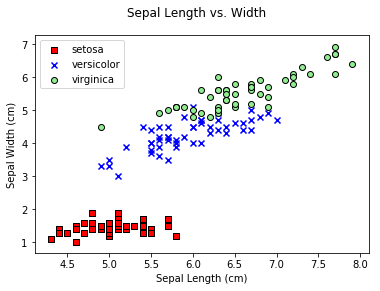

In [4]:
# Plot sepal data to inspect how samples cluster

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Use sepal length and width as predictor variables
X = iris.data[ :, [ 0, 2 ] ]
y = iris.target

markers = ( 's', 'x', 'o' )
colors = ( 'red', 'blue', 'lightgreen' )
cmap = ListedColormap( colors[ :len( np.unique( y ) ) ] )

fig = plt.figure()
for i, col in enumerate( np.unique( y ) ):
	plt.scatter(\
	x=X[ y==col, 0 ], y=X[ y==col, 1 ],\
	c=cmap( i ), marker=markers[ i ],\
	edgecolor='black', label=col )
plt.xlabel( 'Sepal Length (cm)' )
plt.ylabel( 'Sepal Width (cm)' )
plt.legend( ['setosa', 'versicolor', 'virginica' ] )
fig.suptitle( 'Sepal Length vs. Width' )

In [5]:
# Split data in training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y )

print( 'Number of training samples:', X_train.shape[ 0 ] )
print( 'Number of test samples:', X_test.shape[ 0 ] )
uniq, n = np.unique( y, return_counts = True )
print( 'Frequency of class values in y:', uniq, n )
uniq, n = np.unique( y_train, return_counts = True )
print( 'Frequency of class values in training dataset:', uniq, n )
uniq, n = np.unique( y_test, return_counts = True )
print( 'Frequency of class values in test dataset:', uniq, n )

Number of training samples: 105
Number of test samples: 45
Frequency of class values in y: [0 1 2] [50 50 50]
Frequency of class values in training dataset: [0 1 2] [35 35 35]
Frequency of class values in test dataset: [0 1 2] [15 15 15]


In [8]:
from sklearn.preprocessing import StandardScaler

# Fit a standard scalar to the predictive variables
sc = StandardScaler()
sc.fit( X_train )

# Transform predictive datasets based on the scalar
X_train_std = sc.transform( X_train )
X_test_std = sc.transform( X_test )

# Join (stack) the data training and test sets into a sequence of rows
X_comb_std = np.vstack( ( X_train_std, X_test_std ) )

# Join (stack) the target training and test sets into a 1D horizontal column
y_comb = np.hstack( ( y_train, y_test ) )

# Print some descriptive statistics about training and target
print( 'Standardized data array:' )
print( X_comb_std[ :5 ], '\n---\n', X_comb_std[ -5: ] )
print( 'Target array:' )
print( y_comb )

Standardized data array:
[[ 0.55672553  0.37195863]
 [ 1.04795393  0.71656737]
 [ 0.80233973  1.00374131]
 [ 1.29356814  1.11861089]
 [-0.05730998 -1.46595462]] 
---
 [[-0.30292418  0.19965427]
 [ 0.31111132  1.0611761 ]
 [-0.79415259 -1.29365025]
 [-0.91695969 -1.29365025]
 [-0.18011708  0.71656737]]
Target array:
[1 1 2 2 0 2 1 1 0 1 1 2 0 1 0 0 2 0 1 1 0 2 1 0 1 2 0 1 2 0 2 1 0 1 1 0 2
 2 1 1 2 0 2 2 2 1 0 2 2 0 2 0 1 2 1 0 2 1 1 2 0 0 0 0 2 1 2 0 2 2 1 2 2 1
 0 1 0 2 1 1 0 0 0 0 2 0 2 1 2 0 2 0 0 0 1 1 1 2 0 1 1 1 0 2 2 1 0 2 2 2 1
 0 1 1 1 2 2 2 2 2 0 1 1 0 1 1 2 0 0 1 1 2 0 2 0 0 2 0 1 0 1 2 0 1 0 1 2 0
 0 2]


In [10]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Build a perceptron model based on training data, then classify test data
ppn = Perceptron( max_iter=40, eta0=0.1, random_state=0 )
ppn.fit( X_train_std, y_train )
y_pred = ppn.predict( X_test_std )

# Print results of classification
print( 'Perceptron Model:' )
print( 'Misclassified samples: %d' % ( y_test != y_pred ).sum() )
print( 'Accuracy on training data: {:.2f} (out of 1)'.format( ppn.score( X_train_std, y_train ) ) )
print( 'Accuracy on test data: {:.2f} (out of 1)'.format( ppn.score( X_test_std, y_test ) ) )

Perceptron Model:
Misclassified samples: 16
Accuracy on training data: 0.66 (out of 1)
Accuracy on test data: 0.64 (out of 1)


In [13]:
from sklearn.svm import SVC

# Build an SVC model based on training data, then classify test data
svc = SVC( kernel='rbf', gamma=0.1, C=1.0, random_state=0 )
svc.fit( X_train_std, y_train )
y_pred = svc.predict( X_test_std )

# Print results of classification
print( 'SVC Model:' )
print( 'Misclassified samples: %d' % ( y_test != y_pred ).sum() )
print( 'Accuracy on training data: {:.2f} (out of 1)'.format( svc.score( X_train_std, y_train ) ) )
print( 'Accuracy on test data: {:.2f} (out of 1)'.format( svc.score( X_test_std, y_test ) ) )

SVC Model:
Misclassified samples: 7
Accuracy on training data: 0.95 (out of 1)
Accuracy on test data: 0.84 (out of 1)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN model based on training data, then classify test data
knn = KNeighborsClassifier( n_neighbors=5, p=2, metric='minkowski' )
knn.fit( X_train_std, y_train )
y_pred = knn.predict( X_test_std )

# Print results of classification
print( 'KNN Model:' )
print( 'Misclassified samples: %d' % ( y_test != y_pred ).sum() )
print( 'Accuracy on training data: {:.2f} (out of 1)'.format( knn.score( X_train_std, y_train ) ) )
print( 'Accuracy on test data: {:.2f} (out of 1)'.format( knn.score( X_test_std, y_test ) ) )

KNN Model:
Misclassified samples: 5
Accuracy on training data: 0.98 (out of 1)
Accuracy on test data: 0.89 (out of 1)


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Build a random forest model based on training data, then classify test data
rf = RandomForestClassifier( n_estimators=100, oob_score=True )
rf.fit( X_train_std, y_train )
y_pred = rf.predict( X_test_std )

# Print results of classification
print( 'Random Forest Model:' )
print( 'Misclassified samples: %d' % ( y_test != y_pred ).sum() )
print( 'Accuracy on training data: {:.2f} (out of 1)'.format( rf.score( X_train_std, y_train ) ) )
print( 'Accuracy on test data: {:.2f} (out of 1)'.format( rf.score( X_test_std, y_test ) ) )
print( 'Out-of-bag accuracy: {:.2f} (out of 1)'.format( rf.oob_score_ ) )

Random Forest Model:
Misclassified samples: 4
Accuracy on training data: 1.00 (out of 1)
Accuracy on test data: 0.91 (out of 1)
Out-of-bag accuracy: 0.95 (out of 1)
